# 4. Modelbuilding

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency, fisher_exact
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [2]:
df = pd.read_csv('/Users/cenkyagkan/books/mynewbook/content/df_leasingrisk_final_clean.csv')

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,label
0,Male,No,0,Graduate,No,5849,0,36,Urban,65318.400,680.400000,No Risk
1,Male,Yes,1,Graduate,No,4583,1508,36,Rural,65318.400,680.400000,No Risk
2,Male,Yes,0,Graduate,Yes,3000,0,36,Urban,48498.912,505.197000,No Risk
3,Male,Yes,0,Not Graduate,No,2583,2358,36,Urban,61236.000,637.875000,No Risk
4,Male,No,0,Graduate,No,6000,0,36,Urban,71952.300,749.503125,No Risk


In [4]:
df = df.astype({"Gender": 'category', "Married": 'category', "Dependents": 'category', "Education": 'category', "Self_Employed": 'category', "Loan_Amount_Term": 'int64', "Property_Area": 'category', "label": 'category'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             557 non-null    category
 1   Married            557 non-null    category
 2   Dependents         557 non-null    category
 3   Education          557 non-null    category
 4   Self_Employed      557 non-null    category
 5   ApplicantIncome    557 non-null    int64   
 6   CoapplicantIncome  557 non-null    int64   
 7   Loan_Amount_Term   557 non-null    int64   
 8   Property_Area      557 non-null    category
 9   Fahrzeugwert       557 non-null    float64 
 10  leasingrate        557 non-null    float64 
 11  label              557 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 26.6 KB


## One-Hot Encoding

In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
df = df.rename(columns={'Education_Not Graduate': 'Education_Not_Graduate', 'Dependents_3+': 'Dependents_3more'})

In [8]:
df

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Fahrzeugwert,leasingrate,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3more,Education_Not_Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,label_Risk
0,5849,0,36,65318.400,680.400000,1,0,0,0,0,0,0,0,1,0
1,4583,1508,36,65318.400,680.400000,1,1,1,0,0,0,0,0,0,0
2,3000,0,36,48498.912,505.197000,1,1,0,0,0,0,1,0,1,0
3,2583,2358,36,61236.000,637.875000,1,1,0,0,0,1,0,0,1,0
4,6000,0,36,71952.300,749.503125,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,3232,1950,36,55112.400,574.087500,1,1,0,0,0,0,0,0,0,0
553,2900,0,36,60385.500,629.015625,0,0,0,0,0,0,0,0,0,0
554,8072,240,36,46478.124,484.147125,1,1,1,0,0,0,0,0,1,0
555,7583,0,36,57255.660,596.413125,1,1,0,1,0,0,0,0,1,0


## Modelbuilding with statsmodels

In [9]:
model = smf.glm(formula = 'label_Risk ~ ApplicantIncome + CoapplicantIncome + Loan_Amount_Term + Fahrzeugwert + leasingrate + Gender_Male + Married_Yes + Dependents_1 + Dependents_2 + Dependents_3more + Education_Not_Graduate + Self_Employed_Yes + Property_Area_Semiurban + Property_Area_Urban' , data=df, family=sm.families.Binomial()).fit()

In [10]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             label_Risk   No. Observations:                  557
Model:                            GLM   Df Residuals:                      543
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.258
Date:                Sun, 19 Dec 2021   Deviance:                       130.52
Time:                        23:21:06   Pearson chi2:                 3.78e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

- Betrachtet man den p-Value der unabhängigen Variablen, dann kann man erkennen, dass nur die Features ApplicantIncome, Fahrzeugwert, Leasingrate und Education_Not_Graduate signifikant sind. Somit werde das Modell nochmals überarbeiten.

### Updating Modell

In [11]:
model2 = smf.glm(formula = 'label_Risk ~ ApplicantIncome + Fahrzeugwert + leasingrate + Education_Not_Graduate ' , data=df, family=sm.families.Binomial()).fit()

In [12]:
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             label_Risk   No. Observations:                  557
Model:                            GLM   Df Residuals:                      553
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.587
Date:                Sun, 19 Dec 2021   Deviance:                       137.17
Time:                        23:21:06   Pearson chi2:                 9.98e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

### Predictions

In [13]:
# Predict and join probabilty to original dataframe
df['Probability_no'] = model2.predict()

In [14]:
df

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Fahrzeugwert,leasingrate,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3more,Education_Not_Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,label_Risk,Probability_no
0,5849,0,36,65318.400,680.400000,1,0,0,0,0,0,0,0,1,0,4.036689e-08
1,4583,1508,36,65318.400,680.400000,1,1,1,0,0,0,0,0,0,0,3.407581e-05
2,3000,0,36,48498.912,505.197000,1,1,0,0,0,0,1,0,1,0,2.935771e-03
3,2583,2358,36,61236.000,637.875000,1,1,0,0,0,1,0,0,1,0,5.891786e-01
4,6000,0,36,71952.300,749.503125,1,0,0,0,0,0,0,0,1,0,8.638289e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,3232,1950,36,55112.400,574.087500,1,1,0,0,0,0,0,0,0,0,4.057968e-03
553,2900,0,36,60385.500,629.015625,0,0,0,0,0,0,0,0,0,0,7.639632e-02
554,8072,240,36,46478.124,484.147125,1,1,1,0,0,0,0,0,1,0,3.449796e-15
555,7583,0,36,57255.660,596.413125,1,1,0,1,0,0,0,0,1,0,5.915458e-13


In [15]:
# Use thresholds to discretize Probability
df['Threshold 0.3'] = np.where(df['Probability_no'] > 0.3, 'No', 'Yes')
df['Threshold 0.4'] = np.where(df['Probability_no'] > 0.4, 'No', 'Yes')
df['Threshold 0.5'] = np.where(df['Probability_no'] > 0.5, 'No', 'Yes')
df['Threshold 0.6'] = np.where(df['Probability_no'] > 0.6, 'No', 'Yes')
df['Threshold 0.7'] = np.where(df['Probability_no'] > 0.7, 'No', 'Yes')

df

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Fahrzeugwert,leasingrate,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3more,...,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,label_Risk,Probability_no,Threshold 0.3,Threshold 0.4,Threshold 0.5,Threshold 0.6,Threshold 0.7
0,5849,0,36,65318.400,680.400000,1,0,0,0,0,...,0,0,1,0,4.036689e-08,Yes,Yes,Yes,Yes,Yes
1,4583,1508,36,65318.400,680.400000,1,1,1,0,0,...,0,0,0,0,3.407581e-05,Yes,Yes,Yes,Yes,Yes
2,3000,0,36,48498.912,505.197000,1,1,0,0,0,...,1,0,1,0,2.935771e-03,Yes,Yes,Yes,Yes,Yes
3,2583,2358,36,61236.000,637.875000,1,1,0,0,0,...,0,0,1,0,5.891786e-01,No,No,No,Yes,Yes
4,6000,0,36,71952.300,749.503125,1,0,0,0,0,...,0,0,1,0,8.638289e-08,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,3232,1950,36,55112.400,574.087500,1,1,0,0,0,...,0,0,0,0,4.057968e-03,Yes,Yes,Yes,Yes,Yes
553,2900,0,36,60385.500,629.015625,0,0,0,0,0,...,0,0,0,0,7.639632e-02,Yes,Yes,Yes,Yes,Yes
554,8072,240,36,46478.124,484.147125,1,1,1,0,0,...,0,0,1,0,3.449796e-15,Yes,Yes,Yes,Yes,Yes
555,7583,0,36,57255.660,596.413125,1,1,0,1,0,...,0,0,1,0,5.915458e-13,Yes,Yes,Yes,Yes,Yes


### Confusionmatrix und Metriken

In [16]:
def print_metrics(df, predicted):
    # Header
    print('-'*50)
    print(f'Metrics for: {predicted}\n')
    
    # Confusion Matrix
    y_actu = pd.Series(df['label_Risk'], name='Actual')
    y_pred = pd.Series(df[predicted], name='Predicted')
    df_conf = pd.crosstab(y_actu, y_pred)
    display(df_conf)
    
    # Confusion Matrix to variables:
    pop = df_conf.values.sum()
    tp = df_conf['Yes'][0]
    tn = df_conf['No'][1]
    fp = df_conf['No'][0]
    fn = df_conf['Yes'][1]
    
    # Metrics
    accuracy = (tp + tn) / pop
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print(f'Accuracy:  {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall:    {recall:.4f}')
    print(f'F1 Score:  {f1_score:.4f} \n')

In [17]:
print_metrics(df, 'Threshold 0.3')
print_metrics(df, 'Threshold 0.4')
print_metrics(df, 'Threshold 0.5')
print_metrics(df, 'Threshold 0.6')
print_metrics(df, 'Threshold 0.7')

--------------------------------------------------
Metrics for: Threshold 0.3



Predicted,No,Yes
Actual,,
0,14,457
1,83,3


Accuracy:  0.9695
Precision: 0.9703
Recall:    0.9935
F1 Score:  0.9817 

--------------------------------------------------
Metrics for: Threshold 0.4



Predicted,No,Yes
Actual,,
0,5,466
1,83,3


Accuracy:  0.9856
Precision: 0.9894
Recall:    0.9936
F1 Score:  0.9915 

--------------------------------------------------
Metrics for: Threshold 0.5



Predicted,No,Yes
Actual,,
0,2,469
1,76,10


Accuracy:  0.9785
Precision: 0.9958
Recall:    0.9791
F1 Score:  0.9874 

--------------------------------------------------
Metrics for: Threshold 0.6



Predicted,No,Yes
Actual,,
0,0,471
1,72,14


Accuracy:  0.9749
Precision: 1.0000
Recall:    0.9711
F1 Score:  0.9854 

--------------------------------------------------
Metrics for: Threshold 0.7



Predicted,No,Yes
Actual,,
0,0,471
1,71,15


Accuracy:  0.9731
Precision: 1.0000
Recall:    0.9691
F1 Score:  0.9843 



## Zusammenfassung des GLM
- Mit dem Generalized linear Modell konnte mit dem Schwellenwert von 0.4 der beste F-Score mit 99% berechnet werden.
- Ich habe mich ersten Schritt gegen SMOTE entschieden, da diese Methode auch ein Overfitting mitsichbringen kann und das Modell trotz einem unbalancierten Modell sehr gut performt.
- Da es in diesem Usecase darum geht, das Risiko von Leasinganträgen zu reduzieren, bevorzuge ich den Recall als Evaluationsmetrik, da der Fokus mehr auf false-negative liegt.
- Wenn es tatsächlich ein Risiko ist, aber es als kein Risiko vorhergesagt wurde, ensteht für Mercedes Benz ein Schaden und diesen gilt es zu vermeiden. -> Deshalb bevorzuge ich den Recall als Evaluationsmetrik.
- **Das Modell wurde hier mit dem ganzen Datensatz gefittet. In den folgenden Zeilen werde ich Traings- und Testdaten erstellen und mit vielen unterschiedlichen Klassifikationsalgorithmen weitere Modelle erstellen.**

## Modelbuilding with sklearn

### Import Dependencies

In [18]:
import time
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer

### Create Train- and Testdataset

In [19]:
df_sk = df.drop(['Probability_no', 'Threshold 0.3', 'Threshold 0.4', 'Threshold 0.5', 'Threshold 0.6', 'Threshold 0.7'], axis=1)

In [20]:
X = df_sk.drop('label_Risk', axis=1)
y = df_sk['label_Risk']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)

Der Wert **random_state** stellt die Reproduzierbarkeit sicher, **shuffle** sorgt dafür, dass die Daten durcheinander gewürfelt werden, für den Fall, dass alle betrügerischen Bestellungen in den Daten zusammenliegen, und **stratify** stellt sicher, dass der Prozentsatz der betrügerischen Bestellungen in den Trainings- und Testdatensätzen gleich ist.

### Baseline Models

In [22]:
classifiers = {
    "LogisticRegression": LogisticRegression(solver = 'lbfgs', max_iter=1000),
    "LGBMClassifier": LGBMClassifier(),
    "XGBClassifier": XGBClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(3),    
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "GaussianNB": GaussianNB()
}

Im folgenden wird auch eine K fold cross validation durchgeführt. Dadurch wird sichergestellt, dass jeder Fold den gleichen Anteil an positiven (Risiko) Klassen enthält.

In [23]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'F1_mean'])

for key in classifiers:

    print('*',key)

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(X_train, y_train)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    
    scorer = make_scorer(f1_score)
    cv_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring=scorer)

    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'F1_mean': cv_scores.mean()
    }

    df_models = df_models.append(row, ignore_index=True)

* LogisticRegression


* LGBMClassifier


* XGBClassifier
[23:21:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-package

[23:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


* KNeighborsClassifier


* DecisionTreeClassifier


* RandomForestClassifier


* AdaBoostClassifier


* GradientBoostingClassifier


* GaussianNB


- Hier habe ich einen benutzerdefinierten Scorer mit make_scorer() erstellt, um den durchschnittlichen F1_Score in der Kreuzvalidierung für jedes Modell zu berechnen.
- Die Ergebnisse werden dann in dem Dataframe df_models abgespeichert.

In [24]:
df_models.sort_values(by='F1_mean')

,model,run_time,F1_mean
8,GaussianNB,0.0,0.606143
3,KNeighborsClassifier,0.01,0.606286
5,RandomForestClassifier,0.11,0.847619
1,LGBMClassifier,0.13,0.893238
4,DecisionTreeClassifier,0.0,0.908952
6,AdaBoostClassifier,0.06,0.920571
7,GradientBoostingClassifier,0.05,0.926905
2,XGBClassifier,0.08,0.955619
0,LogisticRegression,0.02,0.959810


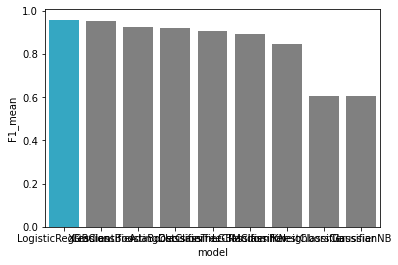

In [25]:
plot_order = df_models.groupby('model')['F1_mean'].sum().sort_values(ascending=False).index.values
clrs = ['grey' if (x < max(df_models.F1_mean)) else '#1DB5DA' for x in df_models.F1_mean]
sns.barplot(x='model', y='F1_mean', data= df_models, palette=clrs, order=plot_order);

- **Das Modell LogisticRegression hat im Verlgeich zu den anderen am besten abgeschnitten** -> Mit einem druchschnittlichen F1 Score von 0,959.
- Der XBgoost_Classifier hat ebenfalls einen sehr guten F1_Score erzielen können und ist auf dem zweiten Platz gelandet.
- Dieses Modell werde in den folgenden Zeilen genauer betrachten, indem ich dafür eine Confusionmatrix erstelle und weitere Metriken berechne.
- Des Weiteren werde ich auch eine Version erstellen indem ich SMOTE verwenden, um zu sehen, ob das oversampling einen positiven Effekt hat.

### Bestes Modell: Logistic Regression

In [26]:
df_result = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

classifier = LogisticRegression(solver = 'lbfgs', max_iter=1000)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


row = {'model': 'XGBClassifier without SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': round(accuracy,3),
        'precision': round(precision,3),
        'recall': round(recall,3),
        'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
    }

df_result = df_result.append(row, ignore_index=True)
df_result.head()

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,XGBClassifier without SMOTE,26,142,0,0,168,0,1.0,1.0,1.0,1.0,1.0


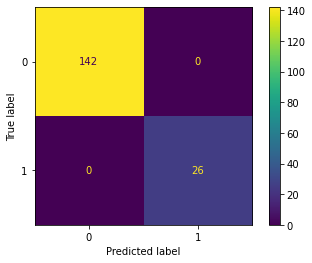

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred_proba = model.predict_proba(X_test)

df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .5})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()
plt.show()